In [13]:
%matplotlib inline

#load dependancies
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy.integrate as integrate

from scipy.io import wavfile
from IPython.display import Audio
from scipy import signal

In [14]:
#Function that will load the data of a WAV file given.
#returns the sampling rate of the song, and the data array itself.

#################  NOTE ##################
#If working with MP3 files, please convert to wav with given conversion file in repository.
#Command for that is "python3 convert.py [songname].mp3 [songname].wav"

def loadData (str):
    rate, data = wavfile.read(str)
    if (len(data.T) > 1):
        data = data.T[0]
    return rate, data

In [15]:
#Function that performs FFT on a randomly sampled portion of data array given.
#Returns the FFT result and the random interval.
def fft (data, intervalSize, rangeofFreq):
    if (len(data) < intervalSize):
        return None;
    start = np.random.randint(0, len(data) - intervalSize + 1)
    chunked = data[start:(start + intervalSize)]
    interv = (start, start + intervalSize)
    return fftpack.fft(chunked, rangeofFreq), interv

In [16]:
temp_folder="../data/"

# audio_path = temp_folder+"morricone_full.mp3"
audio_path = temp_folder+"morricone_30s.wav"

In [17]:
def toRealFreq(f):
    return round(f * (freq / sample_rate))
def toDFTFreq(f):
    return round(f * (sample_rate / freq))

In [18]:
### load the data, perform FFT.

data, freq = librosa.load('morricone_30s.wav', sr=44100)
# freq, data = loadData('closer.wav')

sample_rate = 20000

In [19]:
data = np.divide(data, max(data))
data

array([ 0.        ,  0.        ,  0.        , ..., -0.36779296,
       -0.44264093, -0.34099948], dtype=float32)

In [20]:
print(freq)
print(len(data))
result, randInterval = fft(data, freq // 2, sample_rate)
print(freq // 2)

44100
603821
22050


/Users/akurochkin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


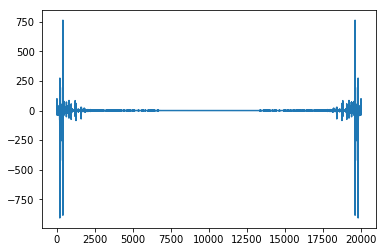

In [21]:
plt.plot(result)
plt.show()


400
10000


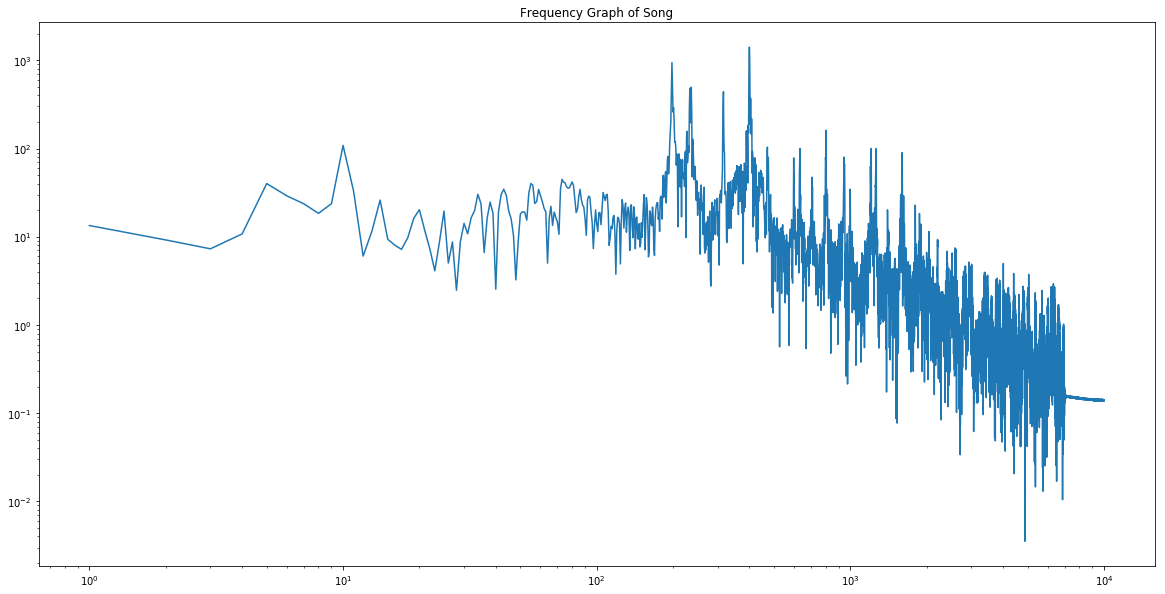

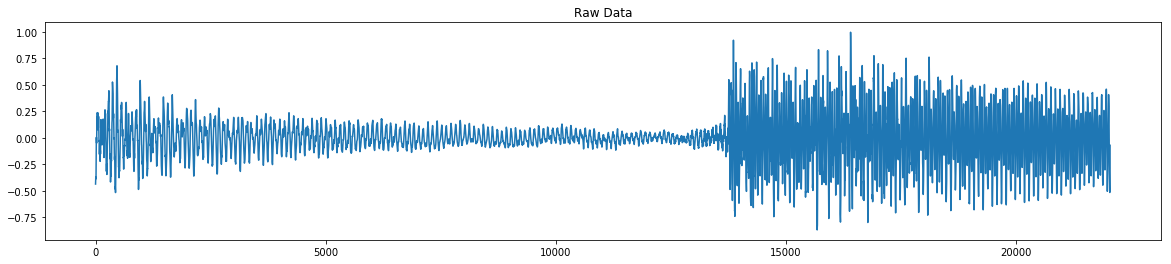

In [22]:
#Take first half because conjugate symmetry. Range of human hearing is 0 to 150000.
magnitudes = [np.absolute(y) for y in result[0:len(result) // 2]]
phase = [np.angle(y) for y in result[0:len(result) // 2]]

print(magnitudes.index(max(magnitudes)))
print(len(magnitudes))

plt.figure(figsize=(20, 10))
plt.xscale('log');plt.yscale('log');plt.title("Frequency Graph of Song");
plt.plot(magnitudes)
plt.show()

# plt.figure(figsize=(20, 10))
# plt.xscale('log');plt.title("Phase Graph of Song");
# plt.plot(phase)
# plt.show()

plt.figure(figsize=(20, 4))
plt.title("Raw Data")
plt.plot(data[randInterval[0]:randInterval[1]])
plt.show()


989.31


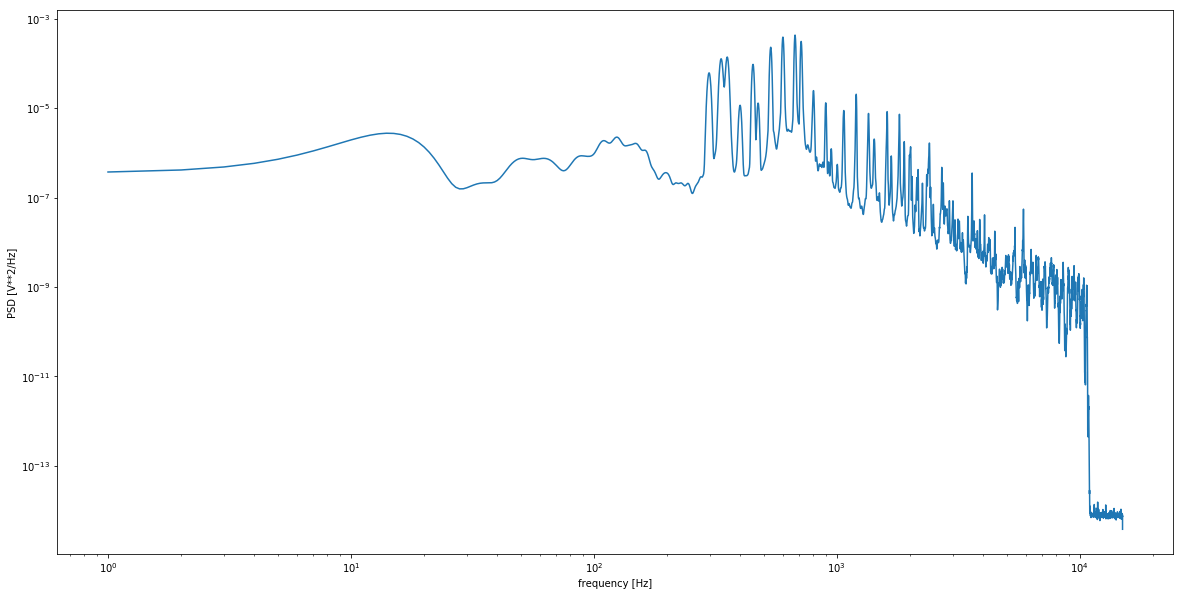

15001


In [23]:
# f, Pxx_den = signal.welch(data, freq, nperseg=freq // 10)
f, Pxx_den = signal.welch(data, freq, nperseg = freq // 10, nfft = 30000)
print(f[Pxx_den.argmax()])
plt.figure(figsize=(20, 10))
# plt.loglog(f, Pxx_den)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/H=z]')
plt.plot(Pxx_den)
plt.show()

powvals = Pxx_den
print(len(Pxx_den))

15001
2.4464817e-09
Subbass:
5.036406e-05
Bass:
0.0006103931
Mids:
0.021575063
High Mids:
0.00014964509
Highs:
5.169385e-06


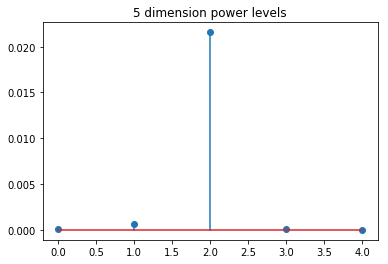

In [24]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs

print(len(powvals))

subbassval = integrate.trapz(powvals[0:61])
bassval = integrate.trapz(powvals[60:301])
midsval = integrate.trapz(powvals[300:2001])
highmidsval = integrate.trapz(powvals[2000:6001])
highval = integrate.trapz(powvals[6000:])

print(powvals[6000])

print("Subbass:")
print(subbassval)

print("Bass:")
print(bassval)

print("Mids:")
print(midsval)

print("High Mids:")
print(highmidsval)

print("Highs:")
print(highval)

arr = [subbassval, bassval, midsval, highmidsval, highval]

plt.stem(arr)
plt.title("5 dimension power levels")
plt.show()

15001
Bass:
0.0006607572
Mids:
0.02172471
Highs:
5.169385e-06


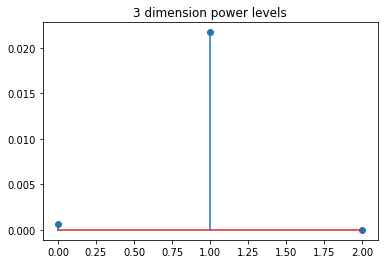

In [25]:
#0 to 300 bass
#300 to 6000  mids
#6000-15000 high

print(len(powvals))

b = integrate.trapz(powvals[0:301])
m = integrate.trapz(powvals[300:6001])
h = integrate.trapz(powvals[6000:])

print("Bass:")
print(b)

print("Mids:")
print(m)

print("Highs:")
print(h)

arr2 = [b, m, h]

plt.stem(arr2)
plt.title("3 dimension power levels")
plt.show()

Subbass:
108.62924
Bass:
44.792908
Mids:
1414.0592
High Mids:
100.439995
Highs:
5.163017


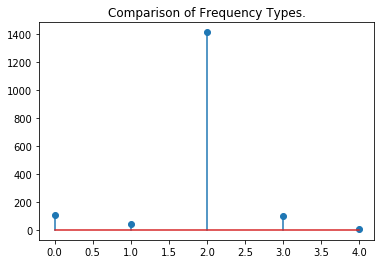

In [26]:
#THIS COMMPARISON METHOD USES THE MAX FREQUENCY.
#INITIAL

def getSpectrumAvgs(magnitudes):

    subbass = magnitudes[toDFTFreq(0):toDFTFreq(60)]
    bass = magnitudes[toDFTFreq(60):toDFTFreq(300)]
    mids = magnitudes[toDFTFreq(300):toDFTFreq(2000)]
    highmids = magnitudes[toDFTFreq(2000):toDFTFreq(6000)]
    highs = magnitudes[toDFTFreq(6000):toDFTFreq(15000)]

    subbassAvg = max(subbass)
    bassAvg = max(bass)
    midsAvg = max(mids)
    highmidsAvg = max(highmids)
    highsAvg = max(highs)
    return subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg

subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg = getSpectrumAvgs(magnitudes)
print("Subbass:")
print(subbassAvg)

print("Bass:")
print(bassAvg)

print("Mids:")
print(midsAvg)

print("High Mids:")
print(highmidsAvg)

print("Highs:")
print(highsAvg)

arr = [subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg]

plt.stem(arr)
plt.title("Comparison of Frequency Types.")
plt.show()



In [27]:
#Here is the randomly sampled portion of the song.
#Feel free to listen.
Audio(data[randInterval[0]:randInterval[1]], rate= freq)

In [28]:
#Here is the whole song.
Audio(data[0:len(data)//16], rate = freq)

In [29]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs

In [30]:
#Music slice
#low_data = [1, 3, 5, 8, 2, 2]
low_data = [0] * len(data)
for i in range(1, len(data)):
    low_data[i] = (data[i] + data[i - 1]) / 2
Audio(low_data, rate= freq)
data = low_data

In [31]:
a = [1, 2, 3, 4, 5, 6]
a[2:len(a) - 2] = [0]
print(a)

[1, 2, 0, 5, 6]


In [50]:
#len(data)

603821

In [39]:
#Music slice
mslice = freq // 10 #Sample every half second
subbassAvgs = list()
bassAvgs = list()
midsAvgs = list()
highmidsAvgs = list()
highsAvgs = list()

for i in range(0, len(data) // mslice):
    
    start = i * mslice
    chunk = data[start:min((start + mslice), len(data))]
    fft_result = fftpack.fft(chunk, sample_rate)
    magnitudes = [np.absolute(y) for y in fft_result[0:len(fft_result) // 2]]
    
    
    subbass, bass, mids, highmids, highs = getSpectrumAvgs(magnitudes)
    print(subbass)
    subbassAvgs.append(subbass)
    bassAvgs.append(bass)
    midsAvgs.append(mids)
    highmidsAvgs.append(highmids)
    highsAvgs.append(highs)

0.0
0.0004632024058683313
5.543224741468281
7.398823405976941
5.305242859311335
3.238545838428845
4.481903824502292
5.304815075811776
7.75366856637563
5.228289755058396
4.518468712704938
12.110498217595493
9.630658987879917
8.077342754389457
4.155064143102843
5.505000608620448
8.362160805994398
11.558837857100539
10.888397129698808
8.89637305715851
7.631909197873873
11.86012316957915
11.214631507304336
10.65614709927072
15.339656843268243
6.189570008167402
11.994497400044963
18.86337378367911
17.20609398358165
16.431832778621096
4.601418352658364
10.288094714511896
19.855688511458126
18.953265536359417
10.784720196213515
13.011965705160547
15.785940377228693
13.242337853041471
17.39766056359101
18.47551223293339
21.76105106077205
9.046675746569207
16.93193358310017
24.48119524614256
20.39341066569748
21.06949848708452
10.982133210641653
10.398897436349932
27.691805965147697
28.348615729466545
11.421832070538189
15.379916765461768
30.426772748032548
7.8417245519872205
16.673268549248323

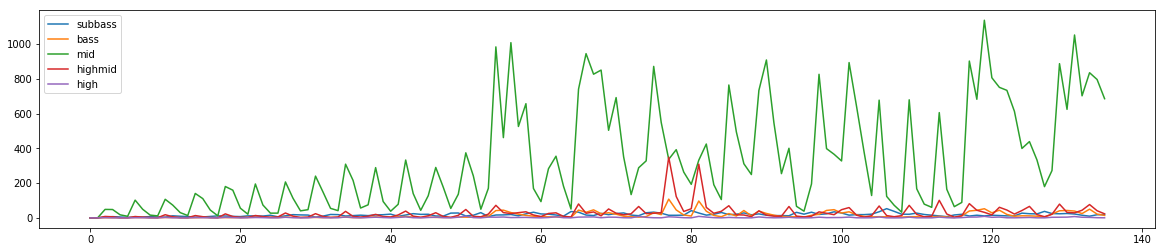

In [33]:
plt.figure(figsize=(20, 4))
plt.plot(subbassAvgs, label="subbass")
plt.plot(bassAvgs, label="bass")
plt.plot(midsAvgs, label="mid")
plt.plot(highmidsAvgs, label="highmid")
plt.plot(highsAvgs, label="high")
plt.legend()
plt.show()

In [47]:
len(midsAvgs)

136